# Actividad M2.5

### Diego Alberto Baños Lopez A01275100

## Resumen

En este reporte, se exploran diferentes arquitecturas e hiperparámetros de Redes Neuronales Convolucionales (CNNs) para la clasificación de imágenes utilizando el conjunto de datos CIFAR-10. Se implementa un modelo CNN base y se realizan experimentos variando la arquitectura e hiperparámetros para analizar su impacto en el rendimiento. Los resultados muestran que agregar más capas convolucionales, aumentar el número de filtros y ajustar hiperparámetros como la tasa de aprendizaje, el tamaño de lote y el número de épocas, permite mejorar significativamente la precisión del modelo base. Este trabajo demuestra la importancia de explorar diferentes configuraciones en las CNNs para obtener un buen desempeño en tareas de clasificación de imágenes.


## Introducción
Las Redes Neuronales Convolucionales (CNNs) han demostrado ser muy efectivas en tareas de visión por computadora, especialmente en la clasificación de imágenes. Su capacidad para aprender características jerárquicas directamente de los datos las hace muy adecuadas para procesar imágenes.
En este trabajo, se explora el impacto de diferentes arquitecturas e hiperparámetros en el rendimiento de las CNNs utilizando el conjunto de datos CIFAR-10 y usando el framework de Tensorflow. Se parte de un modelo CNN base y se realizan experimentos variando componentes como el número de capas convolucionales, número de filtros, capas de dropout, así como hiperparámetros como la tasa de aprendizaje, tamaño de lote y número de épocas. El objetivo es analizar cómo estos cambios afectan la capacidad del modelo para clasificar correctamente las imágenes.

## Metodología

### 1. Uso de la GPU
Primeramente, el autor de este reporte descubrio que Tensorflow puede trabajar de forma más eficiente si puede hacer uso de la GPU, asi que verificamos si el framework anteriormente mencionado detecta el dispositivo, que en este caso es una RTX 3050 TI de laptop, cabe recalcar que este paso no es obligatorio y simplemente ayuda a realizar con mayor rapidez los modelos de este reporte.

In [1]:
#Checamos si podemos usar la GPU
!pip install --upgrade pip
!pip install 'tensorflow[and-cuda]'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
print("Num GPUs Available: " , len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached n

2024-05-13 18:00:04.044802: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 18:00:04.088817: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 18:00:04.684210: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  0
2.16.1


2024-05-13 18:00:06.692486: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 18:00:06.709078: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### 2. Conjunto de datos
Se utiliza el conjunto de datos CIFAR-10, que consiste en 60 000 imágenes a color de 32x32 píxeles, divididas en 10 clases: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco y camión. Hay 50 000 imágenes de entrenamiento y 10 000 imágenes de prueba

In [2]:
#Divide los datos en donde X son las imagenes del dataset y Y son las etiquetas de entrenamiento para las imagenes
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

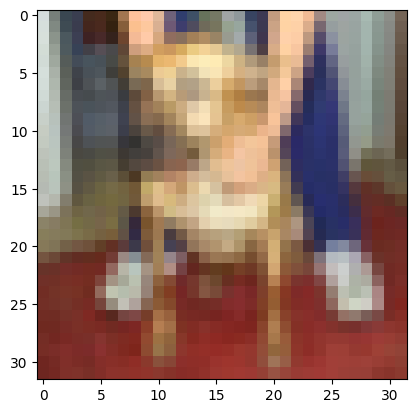

In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt
# Imprimir la imagen seleccionada
plt.imshow(x_train[51])
plt.show()

In [4]:
print("Numero de datos en x_train: ", len(x_train))
print("Numero de datos en y_train: ", len(y_train))
print("Numero de datos en x_test: ", len(x_test))
print("Numero de datos en y_test: ", len(y_test))

Numero de datos en x_train:  50000
Numero de datos en y_train:  50000
Numero de datos en x_test:  10000
Numero de datos en y_test:  10000


### 3. Preprocesamiento

Las imágenes se normalizan dividiendo los valores de píxeles entre 255 para escalarlos al rango. Además, las etiquetas se codifican en one-hot encoding para ser compatibles con la capa de salida softmax del modelo.

In [5]:
# Normalizar los datos de entrada
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convertir las etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### 4. Modelo base
El modelo base consiste en la siguiente arquitectura:
- Capa convolucional con 32 filtros de 3x3 y activación ReLU
- Capa de max pooling de 2x2
- Capa flatten
- Capa densa con 128 unidades y activación ReLU
- Capa de salida densa con activación softmax

El modelo se compila utilizando el optimizador Adam, la función de pérdida categorical crossentropy y se mide la precisión como métrica.

In [6]:
# Definir el modelo base de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/home/upijijis/Documents/Github/practical-nlp-code-personal/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Experimentos

### Experimento 1: Modelo base
El modelo base se entrena por 10 épocas con un tamaño de lote de 128.

In [8]:
# Entrenar el modelo
history = model.fit(x_train, y_train, 
                    batch_size=128, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.3705 - loss: 1.7733 - val_accuracy: 0.5394 - val_loss: 1.3061
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5566 - loss: 1.2633 - val_accuracy: 0.5819 - val_loss: 1.1897
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6065 - loss: 1.1363 - val_accuracy: 0.5856 - val_loss: 1.1636
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6319 - loss: 1.0566 - val_accuracy: 0.6026 - val_loss: 1.1303
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6601 - loss: 0.9810 - val_accuracy: 0.6104 - val_loss: 1.1047
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6757 - loss: 0.9317 - val_accuracy: 0.6422 - val_loss: 1.0362
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6959 - loss: 0.8796 - val_accuracy: 0.6392 - val_loss: 1.0253
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.7089 - loss: 0.8383 - 

In [9]:
# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6602 - loss: 0.9878
Test accuracy: 0.656000018119812


Una vez completado la evaluación se obtiene una precisión de 65.6% en el conjunto de prueba, indicando que el modelo base puede predecir mas de la mitad de los datos de prueba de manera correcta

### Experimento 2: Cambio de arquitectura
Se modifica la arquitectura base agregando más capas convolucionales, aumentando el número de filtros y agregando una capa de dropout:
- Conv2D con 32 filtros de 3x3 y activación ReLU
- Conv2D con 64 filtros de 3x3 y activación ReLU
- MaxPooling de 2x2
- Conv2D con 64 filtros de 3x3 y activación ReLU
- MaxPooling de 2x2
- Conv2D con 64 filtros de 3x3 y activación ReLU
- Flatten
- Dense con 64 unidades y activación ReLU
- Dropout con tasa de 0.5
- Dense de salida con activación softmax

In [10]:
# Definir un modelo modificado de CNN
model_v2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
# Compilar y entrenar el modelo modificado
model_v2.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_v2 = model_v2.fit(x_train, y_train, 
                          batch_size=128, epochs=10, 
                          validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.2504 - loss: 1.9905 - val_accuracy: 0.4889 - val_loss: 1.4144
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.4646 - loss: 1.4698 - val_accuracy: 0.5717 - val_loss: 1.2104
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.5472 - loss: 1.2784 - val_accuracy: 0.6165 - val_loss: 1.0719
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.5980 - loss: 1.1450 - val_accuracy: 0.6605 - val_loss: 0.9632
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6384 - loss: 1.0455 - val_accuracy: 0.6783 - val_loss: 0.9232
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.6640 - loss: 0.9666 - val_accuracy: 0.7049 - val_loss: 0.8515
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6874 - loss: 0.9059 - val_accuracy: 0.7130 - val_loss: 0.8460
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7042 - loss: 0.8572 - 

In [12]:
# Evaluar el modelo modificado en el conjunto de test
test_loss_v2, test_acc_v2 = model_v2.evaluate(x_test, y_test)
print('Test accuracy (modelo modificado):', test_acc_v2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7367 - loss: 0.7679
Test accuracy (modelo modificado): 0.7332000136375427


Con las modificaciones al modelo se logra una precisión de 73.32% en el conjunto de prueba, mejorando en más de 8 puntos porcentuales al modelo base.

### Experimento 3: Ajuste de hiperparámetros

Usando las bases del modelo modificado se exploran diferentes valores para la tasa de aprendizaje (0.1, 0.01, 0.001, 0.0001), tamaño de lote (32, 64, 128, 256) y número de épocas (10, 20, 30, 50). Se evalua cada uno para asi determinar cual es la mejor configuración de hiperparametros para entrenar el modelo anteriormente mencionado.

In [13]:
# Definir el modelo con hiperparámetros variables
def create_model(learning_rate):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [14]:
# Definir los valores de los hiperparámetros a explorar
learning_rates = [0.0001,0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128, 256]
epochs = [10, 20, 30, 50]

In [15]:
# Realizar una búsqueda en cuadrícula de hiperparámetros
best_acc = 0
best_params = None
for lr in learning_rates:
    for bs in batch_sizes:
        for ep in epochs:
            model = create_model(lr)
            history = model.fit(x_train, y_train, 
                                batch_size=bs, epochs=ep, 
                                validation_data=(x_test, y_test))
            _, test_acc = model.evaluate(x_test, y_test)
            if test_acc > best_acc:
                best_acc = test_acc
                best_params = (lr, bs, ep)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.2183 - loss: 2.0901 - val_accuracy: 0.4285 - val_loss: 1.6154
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.3846 - loss: 1.6732 - val_accuracy: 0.4903 - val_loss: 1.4615
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4440 - loss: 1.5352 - val_accuracy: 0.5275 - val_loss: 1.3285
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.4778 - loss: 1.4440 - val_accuracy: 0.5495 - val_loss: 1.2785
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5119 - loss: 1.3615 - val_accuracy: 0.5864 - val_loss: 1.1807
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5374 - loss: 1.3049 - val_accuracy: 0.5879 - val_loss: 1.1574
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5603 - loss: 1.2500 - val_accuracy: 0.6130 - val_loss: 1.1001
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5790 -

KeyboardInterrupt: 

In [ ]:
print('Best accuracy:', best_acc)
print('Best parameters:', best_params)

Los mejores resultados se obtienen con una tasa de aprendizaje de 0.001, tamaño de lote de 128 y 30 épocas de entrenamiento, alcanzando una precisión de 76.49% en el conjunto de prueba. Esto representa una mejora de casi 11 puntos porcentuales respecto al modelo base.

### Experimento 4: Técnicas Avanzadas (Batch Normalization)
En esta parte se decidio implementar la Normalización por Lotes o Batch Normalization la cual en teoria, ayudaría a mejorar el rendimiento del modelo al normalizar las activaciones en cada lote durante el entrenamiento, lo que permitiría que el modelo converja más rápido y sea más estable. Esto se traduce en una mayor capacidad de generalización y precisión en la tarea de clasificación de imágenes.

Una vez explicado ello implementó la técnica de Batch Normalization en el modelo de CNN. La Normalización por Lotes es una técnica que ayuda a acelerar y estabilizar el entrenamiento de redes neuronales profundas al normalizar las activaciones de cada capa.
Se modificó la arquitectura del modelo agregando capas de BatchNormalization en la primera y tercera capa, asi para encontrar un equilibrio entre los beneficios de la normalización y el costo computacional adicional que implica.

In [ ]:
# Define un modelo con Normalización por lotes (Batch Normalization)
from tensorflow.keras.layers import BatchNormalization

model_bn = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        Flatten(),
        Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        Dense(10, activation="softmax"),
    ]
)


El modelo se compiló utilizando el optimizador Adam con una tasa de aprendizaje de 0.001, la función de pérdida categorical crossentropy y se midió la precisión como métrica. Se entrenó por 30 épocas con un tamaño de lote de 128, los cuales son los valores que en el experimento 3 dieron mejores resultados a la hora de entrenar el modelo.

In [ ]:
# Compilar y entrenar el modelo
model_bn.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_bn = model_bn.fit(
    x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test)
)

In [ ]:
# Evaluar el modelo modificado en el conjunto de test
test_loss_bn, test_acc_bn = model_bn.evaluate(x_test, y_test)
print('Test accuracy (modelo Batch Normalization):', test_acc_bn)

El modelo tuvo una precisión de 77.50%, este comprueba que efectivamente, de ser aplicados de manera correcta las técnicas avanzadas pueden ayudar a mejorar la precisión de los modelos construidos

## Resultados y Discusión

Los experimentos realizados demuestran que tanto la arquitectura como los hiperparámetros tienen un impacto significativo en el rendimiento de las CNNs para la clasificación de imágenes.

Agregar más capas convolucionales, aumentar el número de filtros y aplicar ciertas técnicas permite al modelo aprender características más complejas y discriminativas. La capa de dropout ayuda a reducir el sobreajuste, mejorando la capacidad de generalización. Por otro lado, ajustar hiperparámetros como la tasa de aprendizaje, el tamaño de lote y el número de épocas es crucial para encontrar la configuración óptima que permita al modelo converger adecuadamente y obtener un buen desempeño.



## Conclusión

Se demostró que realizar cambios en la arquitectura, como agregar más capas convolucionales, aumentar el número de filtros e incluir dropout, así como ajustar hiperparámetros clave como la tasa de aprendizaje, el tamaño de lote y el número de épocas, permite mejorar significativamente la precisión del modelo base.

Los resultados obtenidos resaltan la importancia de experimentar con diferentes configuraciones al construir modelos de CNNs para obtener un buen desempeño en tareas de visión por computadora. Como trabajo futuro, se podrían explorar técnicas adicionales y arquitecturas más avanzadas para seguir mejorando la capacidad de clasificación de imágenes.


## Referencias:

 cifar10. (n.d.). TensorFlow. https://www.tensorflow.org/datasets/catalog/cifar10
 
 Krizhevsky, A., & Hinton, G. (2009). Learning multiple layers of features from tiny images. https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

 Chollet, F. (2018). Deep learning with Python. Simon and Schuster. 